In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from scipy import integrate
from tqdm import tqdm

In [2]:
func = lambda x,R: 2*np.sqrt(R**2-x**2)
R=1

In [3]:
integrate.quad(func, -R, R, args=(R))

(3.1415926535897967, 2.000470900043183e-09)

In [4]:
N = 1000
points = np.zeros((N,2))

for i in range(N):
    # se va a hacer un u que sea aleatorio y vamos a ver como 
    # cayendo en el circulo aleatoriamente se encuentra el area
    u = np.random.rand()
    r = R*u**(1/2)
    theta = np.random.uniform(0, 2*np.pi)
    
    points[i] = np.array([r*np.cos(theta), r*np.sin(theta)])

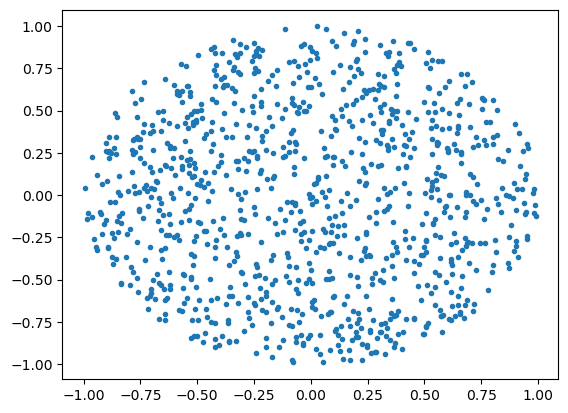

In [5]:
plt.scatter(points[:,0], points[:,1], marker='.')

In [6]:
def CreateCylinder (N, R=1,z1=0, z2=2):
    Points = np.zeros((N,3))
    
    for i in tqdm(range(N)):
        u = np.random.rand()
        r = R*u**(1/2)
        phi = np.random.uniform(0, 2*np.pi)
        z = np.random.uniform(z1,z2)
        
        #transformación coordenadas cartesianas a cilindricas
        Points[i] = [r*np.cos(phi), r*np.sin(phi), z]
        
    return Points

In [7]:
Cylinder = CreateCylinder(1000)

100%|███████████████████████████████████| 1000/1000 [00:00<00:00, 133815.21it/s]


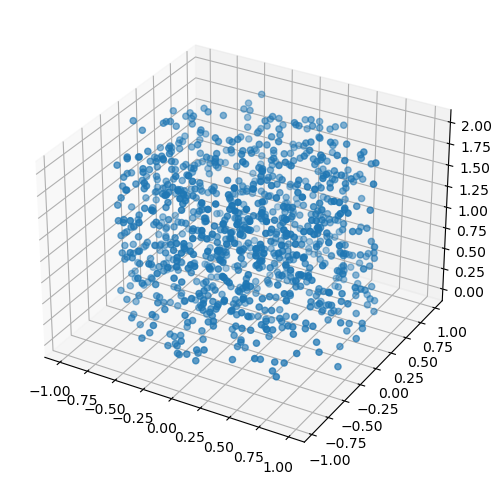

In [20]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Cylinder[:,0],Cylinder[:,1],Cylinder[:,2])

In [9]:
def f(r,z):
    return r*z

R = 1
z1 = 0
z2 = 2
N = int(1e5)
Sample = np.zeros(N)
for i in range(N):
    u = np.random.rand()
    r = R*u**(1/2)
    z = np.random.uniform(z1,z2)
    Sample[i] = f(r,z)

In [10]:
Vc = np.pi*R**2*(z2-z1)
print(np.average(Sample)*Vc,4*np.pi/3)

4.18125683208705 4.1887902047863905


# Esfera

In [11]:
def CreateSphere(N,R=1):
    Points = np.zeros((N,3))
    
    for i in tqdm(range(N)):
        phi = np.random.uniform(0,2*np.pi)
        u = np.random.rand()
        r = R*u**(1/3)
        costheta = np.random.uniform(-1,1)
        theta = np.arccos(costheta)
        
        Points[i] = [r*np.cos(phi)*np.sin(theta),r*np.sin(phi)*np.sin(theta),r*np.cos(theta)]
        
    return Points

In [12]:
Sphere = CreateSphere(10000)


100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 95478.29it/s]


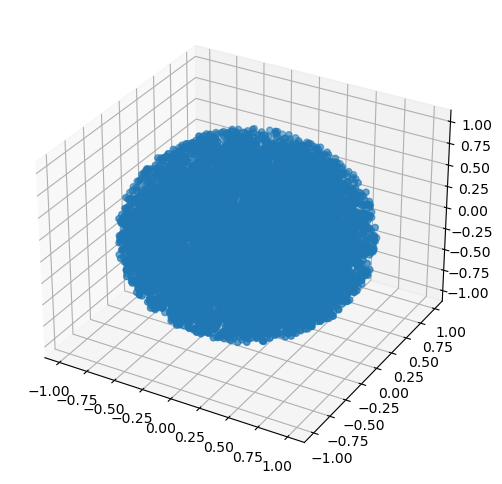

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Sphere[:,0],Sphere[:,1],Sphere[:,2])

In [14]:
def f2(x,y,z):
    return np.exp(np.sqrt(x**2+y**2+z**2))

In [15]:
Sample = np.zeros(Sphere.shape[0])

for i in range(Sphere.shape[0]):
    Sample[i] = f2(Sphere[i,0], Sphere[i,1], Sphere[i,2])

In [16]:
I = np.average(Sample)
I *= 4*np.pi/3 
print(I,4*np.pi*(np.exp(1)-2))

9.039651413396019 9.02619566197592


In [17]:
N = 100000
# pagina 54
def f3(l):
    return (np.sum(l))**2


Sample = np.zeros(N)

for i in range(N):
    Sample[i] = f3(np.random.uniform(0,1,size=8))

In [18]:
I = np.average(Sample)*2**(-7)
print(I)

0.13029913983404584


In [19]:
25/192

0.13020833333333334